In [1]:
import torch

import numpy as np

from ToDayGAN.models import networks
from ToDayGAN.models.combogan_model import ComboGANModel

from PIL import Image

import matplotlib.pyplot as plt

from torchvision import transforms

In [2]:
img = Image.open('datasets/train/nighttime/cam_03_00001_jpg.rf.32cbfc258530ee25cfa4ef0906992538.jpg')

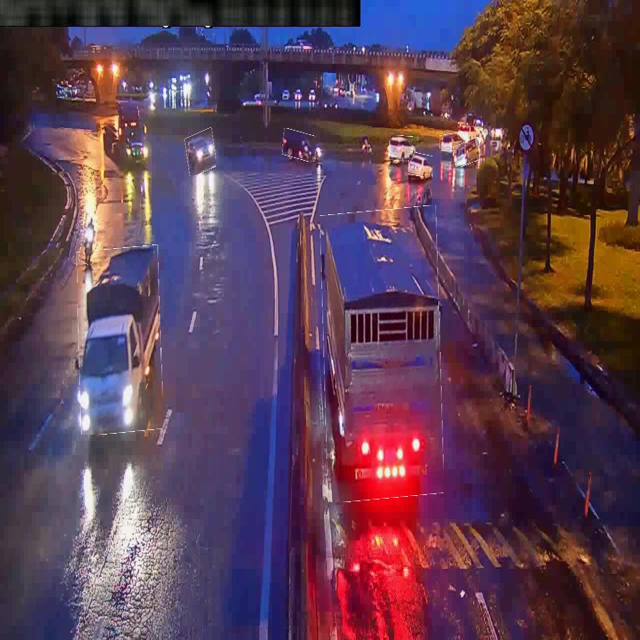

In [3]:
img = img.resize([640, 640])
img

In [4]:
model = networks.define_G(3, 3, 64, 9, 0, 2, 'instance', False, [0]).cpu()

In [5]:
tfm = transforms.Compose([
    transforms.Resize(286),
    transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))])

In [6]:
tfm_img = tfm(img)
model.eval()

ResnetGenEncoder(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): PReLU(num_parameters=1)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): PReLU(num_parameters=1)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): PReLU(num_parameters=1)
    (10): ResnetBlock(
      (conv_block): SequentialContext(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): PReLU(num_parameters=1)
        (4): Reflect

In [17]:
out_img = model(tfm_img.unsqueeze(0).cuda(), 1, 1)

In [18]:
np_img = (out_img[0].cpu().detach().permute(1, 2, 0).numpy().squeeze() + 1) / 2

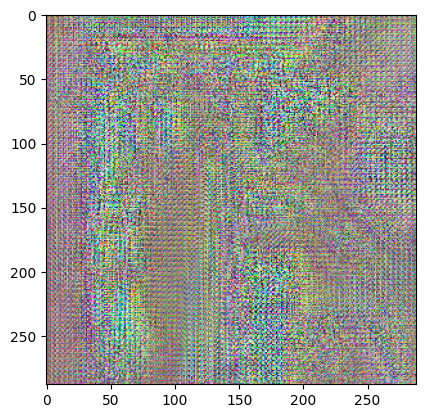